In [46]:
# https://signate.jp/competitions/114
# レンタル自転車の利用者数予測

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression as LR
import seaborn as sns
sns.set_style('whitegrid')

In [37]:
train = pd.read_csv('train.tsv', sep='\t')
test = pd.read_csv('test.tsv', sep='\t')
sample = pd.read_csv('sample_submit.csv', header=None)

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8645 entries, 0 to 8644
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          8645 non-null   int64  
 1   dteday      8645 non-null   object 
 2   season      8645 non-null   int64  
 3   yr          8645 non-null   int64  
 4   mnth        8645 non-null   int64  
 5   hr          8645 non-null   int64  
 6   holiday     8645 non-null   int64  
 7   weekday     8645 non-null   int64  
 8   workingday  8645 non-null   int64  
 9   weathersit  8645 non-null   int64  
 10  temp        8645 non-null   float64
 11  atemp       8645 non-null   float64
 12  hum         8645 non-null   float64
 13  windspeed   8645 non-null   float64
 14  cnt         8645 non-null   int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 1013.2+ KB


In [57]:
train['season'].value_counts()

3    2240
2    2203
4    2134
1    2068
Name: season, dtype: int64

In [71]:
train.head(10)

,id,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,14


In [72]:
train['temp'] = train['temp'] * 100

In [74]:
train.head(10)

,id,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,24.0,0.2879,0.81,0.0000,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,22.0,0.2727,0.80,0.0000,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,22.0,0.2727,0.80,0.0000,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,24.0,0.2879,0.75,0.0000,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,24.0,0.2879,0.75,0.0000,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,24.0,0.2576,0.75,0.0896,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,22.0,0.2727,0.80,0.0000,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,20.0,0.2576,0.86,0.0000,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,24.0,0.2879,0.75,0.0000,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,32.0,0.3485,0.76,0.0000,14


In [64]:
train2

,id,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
1807,1808,2011-03-21,2,0,3,0,0,1,1,3,0.34,0.3030,0.66,0.3881,13
1808,1809,2011-03-21,2,0,3,1,0,1,1,2,0.34,0.3030,0.71,0.3881,7
1809,1810,2011-03-21,2,0,3,2,0,1,1,2,0.34,0.3030,0.71,0.3284,6
1810,1811,2011-03-21,2,0,3,3,0,1,1,2,0.34,0.3030,0.71,0.3284,1
1811,1812,2011-03-21,2,0,3,5,0,1,1,1,0.32,0.3030,0.81,0.2985,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4005,4006,2011-06-20,2,0,6,19,0,1,1,1,0.66,0.6212,0.65,0.2239,431
4006,4007,2011-06-20,2,0,6,20,0,1,1,1,0.66,0.6212,0.69,0.2239,316
4007,4008,2011-06-20,2,0,6,21,0,1,1,1,0.64,0.6061,0.73,0.1642,206
4008,4009,2011-06-20,2,0,6,22,0,1,1,2,0.64,0.6061,0.73,0.2239,130


In [67]:
train2['season'].value_counts()

2    2203
Name: season, dtype: int64

In [61]:
train.head(10)

,id,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,14


In [40]:
sample.head()

,0,1
0,8646,335
1,8647,423
2,8648,516
3,8649,200
4,8650,237


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8645 entries, 0 to 8644
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          8645 non-null   int64  
 1   dteday      8645 non-null   object 
 2   season      8645 non-null   int64  
 3   yr          8645 non-null   int64  
 4   mnth        8645 non-null   int64  
 5   hr          8645 non-null   int64  
 6   holiday     8645 non-null   int64  
 7   weekday     8645 non-null   int64  
 8   workingday  8645 non-null   int64  
 9   weathersit  8645 non-null   int64  
 10  temp        8645 non-null   float64
 11  atemp       8645 non-null   float64
 12  hum         8645 non-null   float64
 13  windspeed   8645 non-null   float64
 14  cnt         8645 non-null   int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 1013.2+ KB


In [42]:
train['season'].value_counts()

3    2240
2    2203
4    2134
1    2068
Name: season, dtype: int64

In [43]:
# 分類の分け方
# 連休の概念、天気として晴れか、曇り、雨に分類


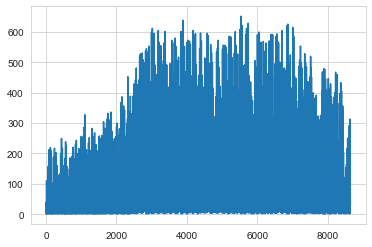

In [47]:
train['cnt'].plot()

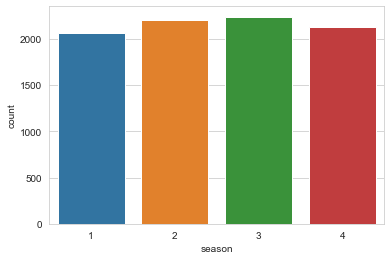

In [48]:
sns.countplot('season', data=train)

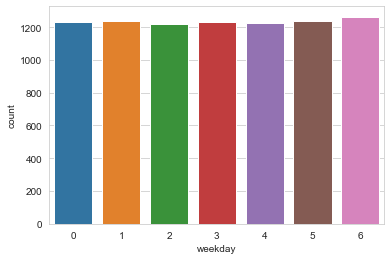

In [49]:
sns.countplot('weekday', data=train)

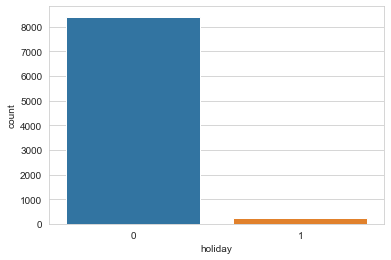

In [51]:
sns.countplot('holiday', data=train)

In [54]:
train.isnull().any()

id            False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
cnt           False
dtype: bool

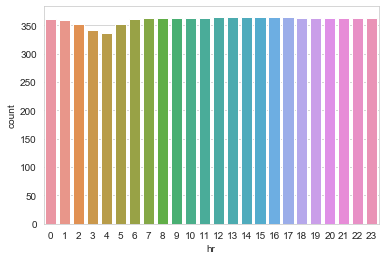

In [55]:
sns.countplot('hr', data=train)